In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
import time

start_time = time.time()
end_time = time.time()
run_time = end_time - start_time
print(f"代码运行时间: {run_time} 秒")
warnings.filterwarnings("ignore")

df = pd.read_excel('/kaggle/input/cancerdata/cancer.xlsx')

代码运行时间: 2.8848648071289062e-05 秒


In [2]:
data = df.rename(columns={'Column1': 'ID', 'Column2': 'Y', 'Column3': 'radius1', 'Column4': 'texture1', 'Column5': 'perimeter1', 
                     'Column6': 'area1', 'Column7': 'smoothness1', 'Column8': 'compactness1', 'Column9': 'concavity1', 'Column10': 'concave_points1',
                     'Column11': 'symmetry1', 'Column12': 'fractal_dimension1', 'Column13': 'radius2', 'Column14': 'texture2', 'Column15': 'perimeter2', 
                     'Column16': 'area2', 'Column17': 'smoothness2', 'Column18': 'compactness2', 'Column19': 'concavity2', 'Column20': 'concave_points2',
                     'Column21': 'symmetry2', 'Column22': 'fractal_dimension2', 'Column23': 'radius3', 'Column24': 'texture3', 'Column25': 'perimeter3', 
                     'Column26': 'area3', 'Column27':'smoothness3', 'Column28': 'compactness3', 'Column29': 'concavity3', 'Column30': 'concave_points3',
                     'Column31': 'symmetry3', 'Column32': 'fractal_dimension3'})
data['Y'] = data['Y'].replace({'B': 0, 'M': 1})
data
data.to_csv('cancer_feature.csv', index=False)

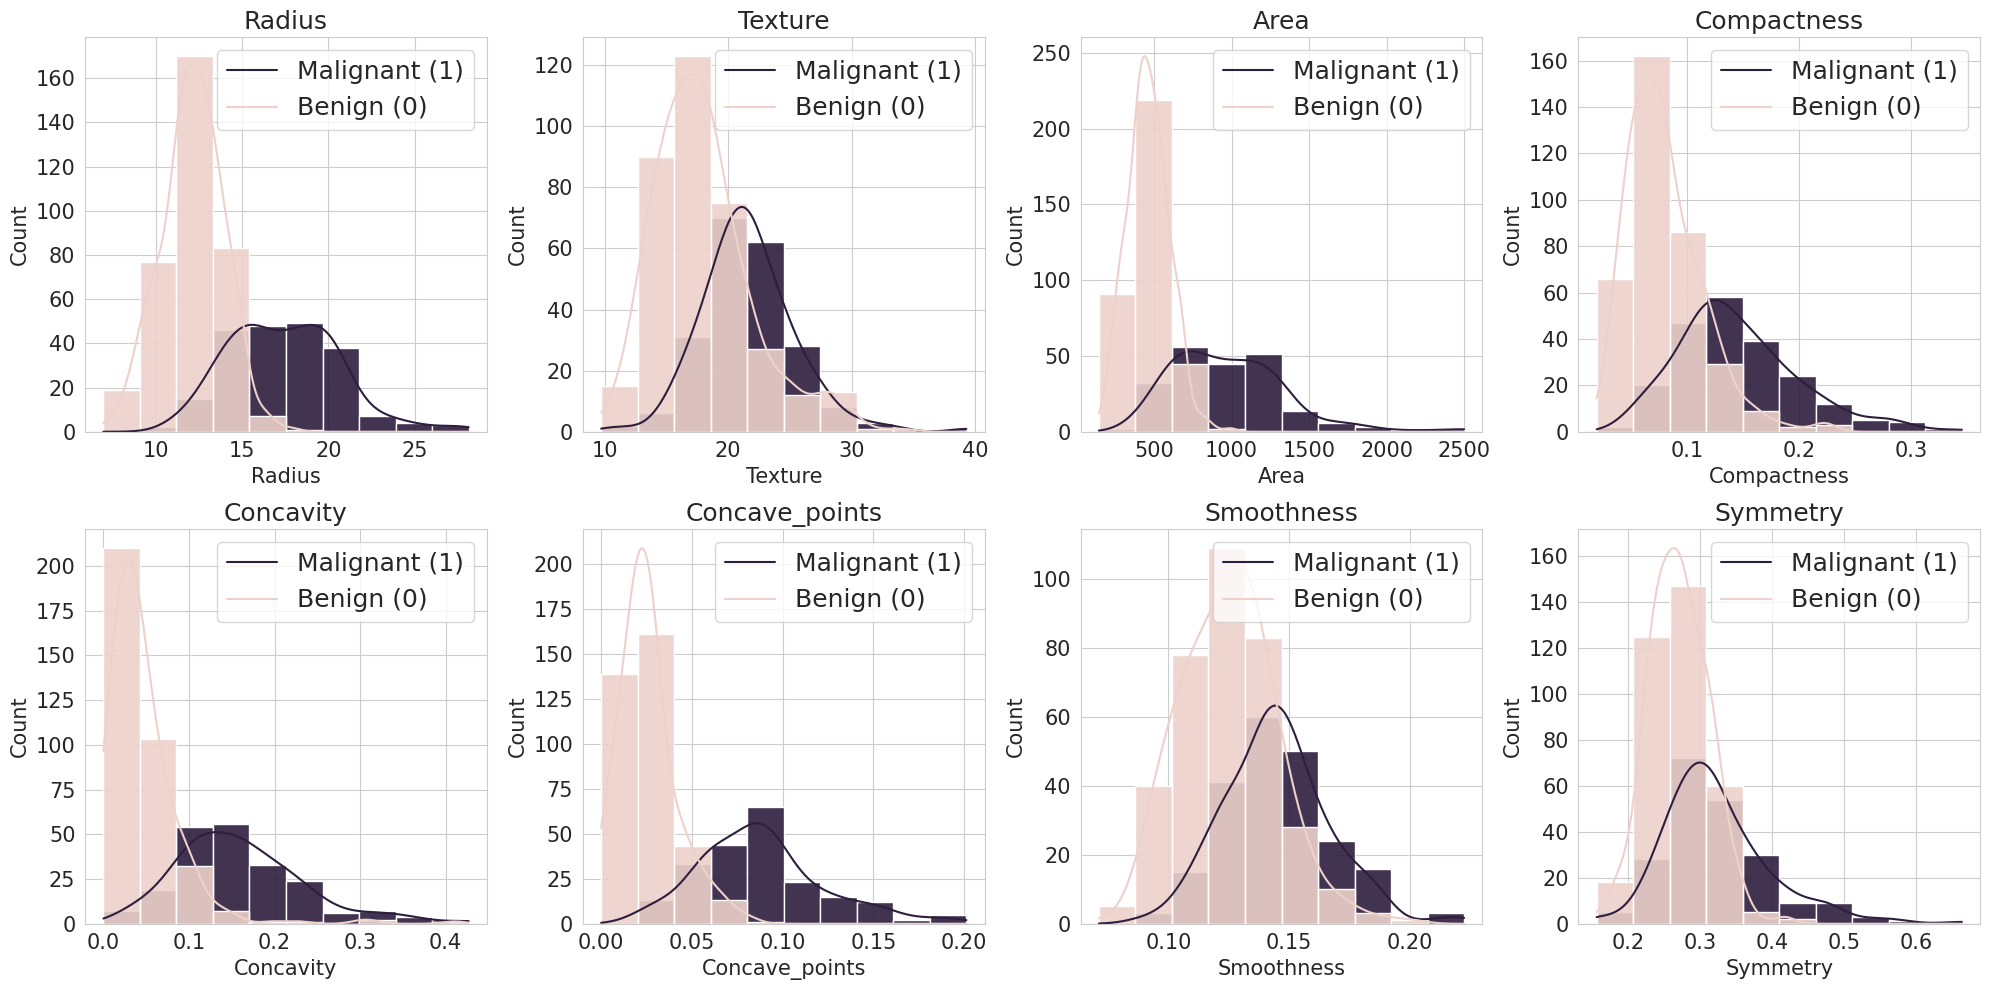

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("OrRd_r")

# Load data
df = pd.read_csv('/kaggle/input/related-feature/cancer_feature.csv')
data = df

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
variables = ['radius', 'texture', 'area', 'compactness', 'concavity', 'concave_points', 'smoothness', 'symmetry']

# Plot histograms
for i, var in enumerate(variables):
    row = i // 4
    col = i % 4

    sns.histplot(data=data, x=var, hue='Y', bins=10, kde=True, common_norm=False, ax=axes[row, col], alpha=0.9)
    axes[row, col].set_title(f'{var.capitalize()}', fontsize=18)
    axes[row, col].set_xlabel(var.capitalize(), fontsize=15)
    axes[row, col].set_ylabel('Count', fontsize=15)
    axes[row, col].legend(labels=['Malignant (1)', 'Benign (0)'], fontsize=18)
    axes[row, col].tick_params(axis='both', labelsize=15)

# Remove empty subplots
for i in range(len(variables), 2 * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('distribution.png')
plt.show()
